# **Analisis Trans Jakarta**
___

## **Stakeholder**

Pihak Marketing dan Manajemen Transjakarta

## **Latar Belakang Masalah**

Terjadinya kemacetan di Jakarta, salah satunya dikarenakan semakin banyaknya kendaraan yang berada di jalan raya. Salah satu solusi yang dapat digunakan untuk mengurangi kendaraan di jalan raya adalah dengan menggalakkan penggunaan transportasi umum untuk bepergian. Salah satu transportasi umum di Jakarta adalah transjakarta.

## **Tujuan**

Di sini, akan dianalisis kebiasaan atau karakteristik penumpang yang diharapkan dapat menjadi insight, sehingga dapat diperoleh ide atau saran untuk menaikkan minat masyarakat terhadap penggunaan transjakarta. Dengan naiknya minat masyarakat dalam penggunaan transjakarta, diharapkan dapat mengurangi penggunaan kendaraan pribadi di jalan raya dan menaikkan pendapatan untuk perusahaan yang memanajemen transjakarta.

## **Rumusan Masalah**

Untuk meningkatkan jumlah penumpang, kita perlu menganalisis hal-hal berikut.
1. Berdasarkan gender, mana yang lebih banyak naik transjakarta?
2. Berdasarkan kategori usia, mana yang lebih banyak naik transjakarta?
3. Apakah ada hubungan antara variabel usia dengan variabel harga transjakarta?
4. Apakah ada hubungan antara variabel usia dengan variabel jam tap in?
5. Paycard Bank apa yang paling banyak digunakan?
6. Kapan terjadi lonjakan jumlah penumpang?
7. Siapa yang paling sering naik transjakarta?

## **Eksplorasi dan Pembersihan Data**

### **Import Library**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### **Import Data**

In [3]:
# menampilkan seluruh kolom
pd.set_option('display.max_columns', 500)

# import data
df = pd.read_csv("Transjakarta.csv")

# menampilkan 3 data teratas
df.head(3)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0


### **Info Umum Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Dari pencarian informasi umum tentang dataset tersebut, diperoleh :
- Dataset memiliki 22 kolom, yaitu:
    1. transID: ID transaksi. Setiap transaksi memiliki ID yang berbeda.
    2. payCardID: ID pada kartu pelanggan. Kartu ini digunakan sebagai tiket untuk masuk dan keluar Trans Jakarta.
    3. payCardBank: Nama bank pada kartu pelanggan.
    4. payCardName: Nama pelanggan yang ada pada kartu.
    5. payCardSex: Jenis kelamin pelanggan sesuai dengan yang terdaftar pada kartu.
    6. payCardBirthDate: Tahun lahir pelanggan sesuai dengan yang terdaftar pada kartu.
    7. corridorID: ID koridor/ID rute sebagai patokan untuk mengelompokkan rute. Corridor ID / Route ID as key for route grouping.
    8. corridorName: Nama koridor/Nama rute dengan format Rute Awal - Rute Akhir.
    9. direction: Arah rute perjalanan. 0 untuk Berangkat, 1 untuk Pulang.
    10. tapInStops: ID halte saat masuk Trans Jakarta. ID ini digunakan untuk mengidentifikasi nama halte.
    11. tapInStopsName: Nama halte saat penumpang masuk / Nama halte keberangkatan.
    12. tapInStopsLat: Garis lintang halte penumpang masuk.
    13. tapInStopsLon: Garis bujur halte penumpang masuk.
    14. stopStartSeq: Urutan pemberhentian transjakarta saat penumpang masuk.
    15. tapInTime: Tanggal dan waktu saat penumpang tap in kartu.
    16. tapOutStops: ID halte saat keluar Trans Jakarta. ID ini digunakan untuk mengidentifikasi nama halte.
    17. tapOutStopsName: Nama halte saat penumpang keluar / Nama halte tujuan.
    18. tapOutStopsLat: Garis lintang halte penumpang keluar.
    19. tapOutStopsLon: Garis bujur halte penumpang keluar.
    20. stopEndSeq: Urutan pemberhentian transjakarta saat penumpang keluar.
    21. tapOutTime: Tanggal dan waktu saat penumpang tap out kartu.
    22. payAmount: Harga yang harus dibayar pelanggan. Beberapa gratis. Beberapa tidak.
- Dataset memiliki 37.900 baris

Dari informasi umum yang diperoleh, diketahui tipe data untuk tapInTime dan tapOutTime bukan tipe 'tanggal', sehingga akan diubah tipe datanya menjadi tipe 'tanggal'.

### **Mengganti Tipe Data Kolom tapInTime dan tapOutTime**

In [5]:
# mengganti tipe data kolom tapInTime dan tapOutTime ke tipe 'datetime'

df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [6]:
# make sure tipe datanya sudah terganti

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

### **Cek Missing Values pada Data**

In [7]:
# menampilkan persentase jumlah missing values pada data

df.isna().sum()/len(df)*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

**Perlakuan:**

Karena persentase jumlah missing values pada data kurang dari 10%, maka data yang memuat missing values akan dihapus berdasarkan baris.

### **Menghapus Data yang Memuat Missing Values Berdasarkan Baris**

In [8]:
# drop data by row

dfClean=df.dropna()

In [9]:
# make sure tidak ada data yang memiliki missing values

dfClean.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

### **Cek Data Duplikat**

Untuk mengecek data duplikat, digunakan transID sebagai kunci untuk pengecekannya karena setiap transaksi memiliki ID yang berbeda, sehingga jika ada duplikasi pada transID, bisa jadi data tersebut tertulis dua kali atau ada kesalahan input pada ID transaksi.

In [10]:
# menampilkan data duplikat

df[df['transID'].duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


Dari hasil pengecekan tersebut, tidak ditemukan transID yang tertulis lebih dari satu kali, sehingga tahap pengecekan data dilanjutkan.

### **Cek Informasi Umum Data yang Sudah Dibersihkan**

In [11]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           31730 non-null  object        
 1   payCardID         31730 non-null  int64         
 2   payCardBank       31730 non-null  object        
 3   payCardName       31730 non-null  object        
 4   payCardSex        31730 non-null  object        
 5   payCardBirthDate  31730 non-null  int64         
 6   corridorID        31730 non-null  object        
 7   corridorName      31730 non-null  object        
 8   direction         31730 non-null  float64       
 9   tapInStops        31730 non-null  object        
 10  tapInStopsName    31730 non-null  object        
 11  tapInStopsLat     31730 non-null  float64       
 12  tapInStopsLon     31730 non-null  float64       
 13  stopStartSeq      31730 non-null  int64         
 14  tapInTime         31730 non

### **Menambah Kolom Baru yang Diperlukan**

In [12]:
# membuat kolom baru berisi waktu (jam) dari kolom tapInTime dan tapOutTime

dfClean['timeIn'] = dfClean['tapInTime'].dt.hour
dfClean['timeOut'] = dfClean['tapOutTime'].dt.hour

# membuat kolom baru berisi hari dari kolom tapInTime
dfClean['dayIn'] = dfClean['tapInTime'].dt.day_name()

# membuat kolom baru berisi umur penumpang
dfClean['age'] = dfClean['tapInTime'].dt.year - dfClean['payCardBirthDate']

dfClean.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,timeIn,timeOut,dayIn,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,41


### **Export Data**

In [13]:
# export data to excel file

dfClean.to_excel("transjakarta.xlsx", index = False)

In [37]:
dfClean['tapInTime'].value_counts().reset_index().sort_values('tapInTime')

,tapInTime,count
31035,2023-04-01 06:22:27,1
16598,2023-04-01 06:54:35,1
31014,2023-04-01 07:32:50,1
30981,2023-04-01 09:41:03,1
30961,2023-04-01 12:35:29,1
...,...,...
28062,2023-04-30 21:35:55,1
28218,2023-04-30 21:43:18,1
28253,2023-04-30 21:46:00,1
28187,2023-04-30 21:48:15,1


## **Analisis Data**

### **Analisis Berdasarkan Demografi**

#### **Menghitung Banyak Penumpang Berdasarkan Gender**

In [15]:
gender = dfClean['payCardSex'].value_counts().reset_index()
gender

,payCardSex,count
0,F,16939
1,M,14791


#### **Mengetahui Proporsi Banyak Penumpang Berdasarkan Gender**

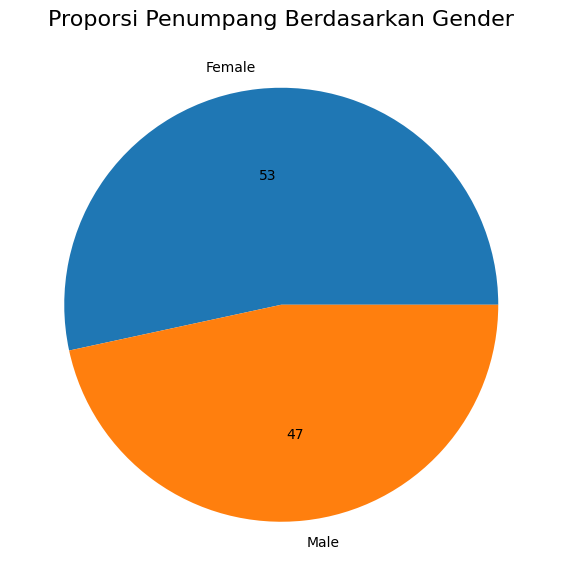

In [16]:
# proporsi penumpang berdasarkan gender

plt.figure(figsize=(7,8)) 
plt.pie(gender['count'],labels = gender['payCardSex'].replace(['F','M'],['Female','Male']), autopct = '%.0f')                      
plt.title('Proporsi Penumpang Berdasarkan Gender', size=16) 
plt.show()

##### **Insight:**

1. Penumpang terbanyak adalah perempuan dengan proporsi 53%.
2. Ada selisih 6% antara banyak penumpang laki-laki dan perempuan.

### **Analisis Berdasarkan Usia**

#### **Cek Outliers Data Usia**

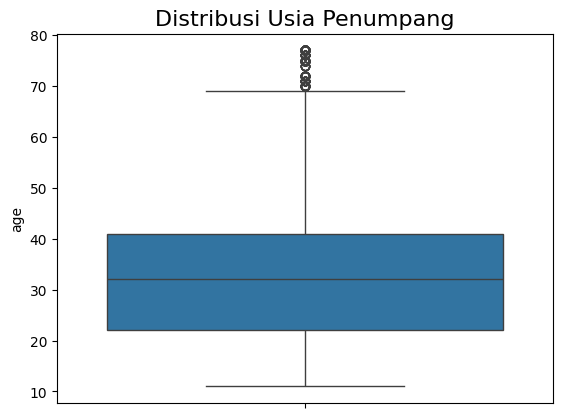

In [17]:
# membuat boxplot

sns.boxplot(dfClean['age'])
plt.title("Distribusi Usia Penumpang",size = 16)
plt.show()

In [18]:
# deskripsikan data usia

dfClean['age'].describe()

count    31730.000000
mean        32.789663
std         13.049288
min         11.000000
25%         22.000000
50%         32.000000
75%         41.000000
max         77.000000
Name: age, dtype: float64

#### **Membuat Kategori Usia**

In [19]:
# membuat kategori usia

def category(age):
    if age <= 20 :
        return("11-20")
    elif age <=30 :
        return("21-30")
    elif age <=40 :
        return("31-40")
    elif age <= 50 :
        return("41-50")
    elif age <= 60 :
        return("51-60")
    elif age <= 70 :
        return("61-70")
    elif age > 70:
        return("> 70")

dfClean['ageCat'] = dfClean['age'].apply(category)

In [20]:
dfClean.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,timeIn,timeOut,dayIn,age,ageCat
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,11-20
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,26,21-30
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,31,31-40
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,45,41-50
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,41,41-50


#### **Membuat Grafik yang Menunjukkan Banyak Penumpang Berdasarkan Kategori Usia**

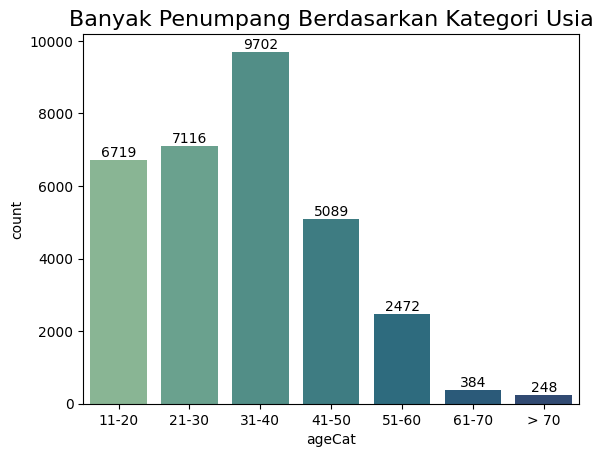

In [21]:
# buat barplot

usiaBar = sns.countplot(data = dfClean, x = 'ageCat', order = ['11-20','21-30','31-40','41-50','51-60','61-70','> 70'],palette='crest')
for i in range(dfClean['ageCat'].nunique()):
    usiaBar.bar_label(usiaBar.containers[i],size = 10)
plt.title("Banyak Penumpang Berdasarkan Kategori Usia", size = 16)
plt.show()

##### **Insight:**

1. Jumlah penumpang selalu mengalami peningkatan hingga kategori usia 31-40 tahun.
2. Jumlah penumpang mulai mengalami penurunan dimulai dari penumpang berusia 41 tahun ke atas.
3. Median dari usia penumpang adalah 32 tahun.

### **Analisis Hubungan Antara Variabel Usia dan Harga Transjakarta**

#### **Membuat Scatterplot : Usia vs Harga Transjakarta**

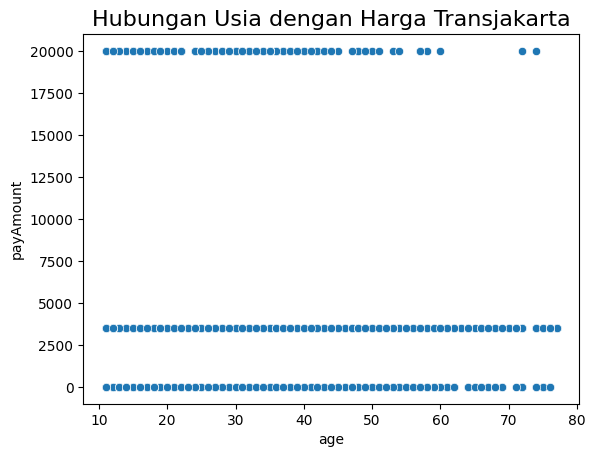

In [22]:
# buat scatterplot

sns.scatterplot(data = dfClean, x=dfClean['age'], y = dfClean['payAmount'])
plt.title("Hubungan Usia dengan Harga Transjakarta",size = 16)
plt.show()

##### **Insight:**

Dari scatterplot di atas, diperoleh tidak adanya hubungan antara variabel usia dan variabel harga Transjakarta.

### **Analisis Hubungan Antara Variabel Usia dengan Jam Tap In**

#### **Membuat Scatterplot : Usia vs Harga Jam Tap In**

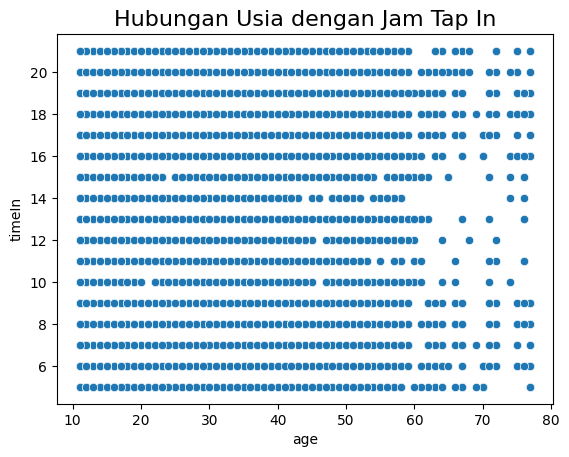

In [23]:
# buat scatterplot

sns.scatterplot(data = dfClean, x=dfClean['age'], y = dfClean['timeIn'])
plt.title("Hubungan Usia dengan Jam Tap In",size = 16)
plt.show()

##### **Insight:**

Dari scatterplot di atas, diperoleh tidak adanya hubungan antara variabel usia dan variabel jam tap in.

### **Analisis Paycard Bank yang Digunakan**

#### **Menghitung Jumlah Pengguna Setiap Paycard Bank**

In [24]:
# hitung penggunaan setiap paycard bank

bank = dfClean['payCardBank'].value_counts().reset_index()
bank

,payCardBank,count
0,dki,15702
1,emoney,5813
2,brizzi,2922
3,flazz,2667
4,online,2364
5,bni,2262


#### **Membuat Bar Plot untuk Jumlah Penumpang Berdasarkan Paycard Bank**

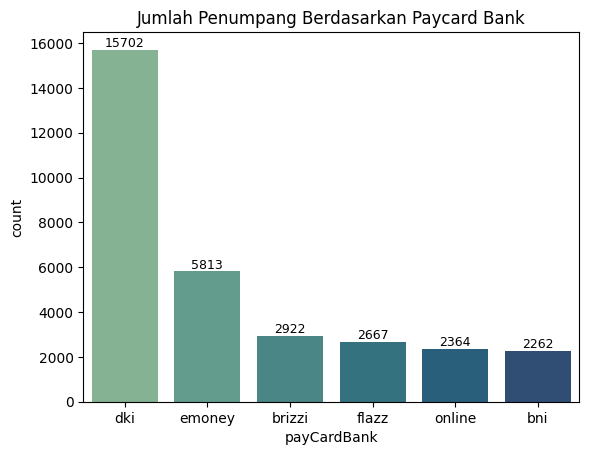

In [25]:
# plotting

bankBar = sns.barplot(data = bank, x = 'payCardBank', y = 'count', palette='crest')
for i in range (len(bank)):
    bankBar.bar_label(bankBar.containers[i], size = 9)
plt.title("Jumlah Penumpang Berdasarkan Paycard Bank")
plt.show()

##### **Insight:**

Paycard bank yang paling banyak digunakan oleh penumpang adalah dki.

### **Analisis Kategori Usia dengan Paycard Bank yang Digunakan**

<Axes: xlabel='payCardBank', ylabel='count'>

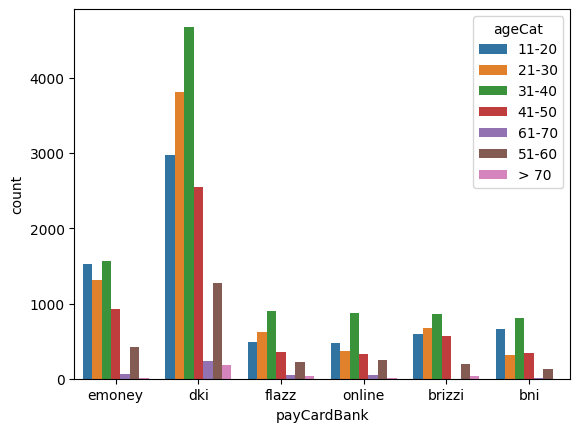

In [26]:
# membuat barplot

sns.countplot(data = dfClean, x = 'payCardBank', hue = 'ageCat')

##### **Insight:**

Paycard dari Bank DKI diminati oleh segala kategori usia.

### **Analisis Waktu Terjadi Lonjakan Jumlah Penumpang**

##### **Membuat Grafik untuk Mengetahui Waktu Lonjakan Penumpang Berdasarkan Jam**

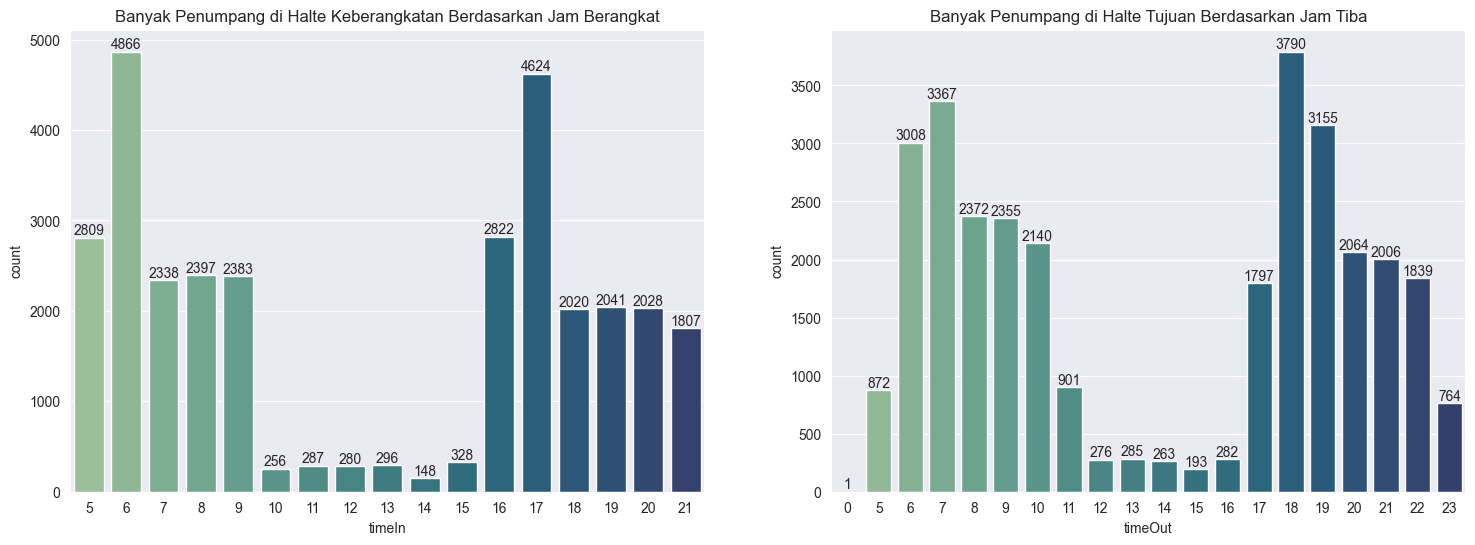

In [27]:
# plot data

plt.figure(figsize=(18,6))
sns.set_style('darkgrid')

# plot data banyak penumpang berdasarkan jam berangkat

plt.subplot(1,2,1)
ax1 = sns.countplot(dfClean, x = 'timeIn',palette="crest")
for i in range (dfClean['timeIn'].nunique()):
    ax1.bar_label(ax1.containers[i],fontsize=10)
plt.title("Banyak Penumpang di Halte Keberangkatan Berdasarkan Jam Berangkat")

# plot data banyak penumpang berdasarkan jam tiba

plt.subplot(1,2,2)
ax2 = sns.countplot(dfClean, x = 'timeOut', palette="crest")
for i in range (dfClean['timeOut'].nunique()):
    ax2.bar_label(ax2.containers[i],fontsize=10)
plt.title("Banyak Penumpang di Halte Tujuan Berdasarkan Jam Tiba")

plt.show()

##### **Membuat Grafik untuk Mengetahui Waktu Lonjakan Penumpang Berdasarkan Hari**

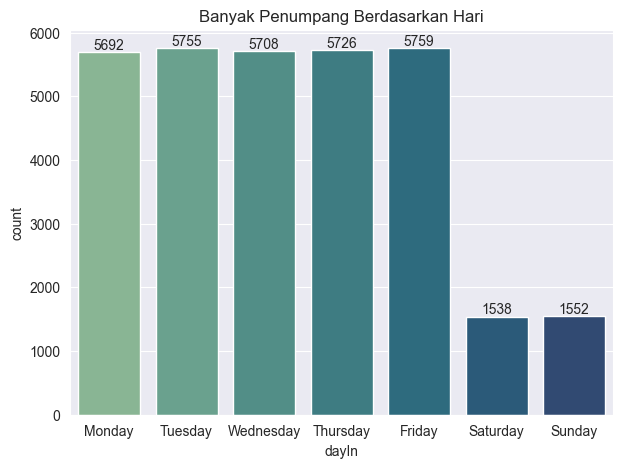

In [28]:
# plot data banyak penumpang berdasarkan hari

plt.figure(figsize=(7,5))

ax3 = sns.countplot(dfClean, x = 'dayIn', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette="crest")
for i in range (dfClean['dayIn'].nunique()):
    ax3.bar_label(ax3.containers[i],fontsize=10)
plt.title("Banyak Penumpang Berdasarkan Hari")
plt.show()

##### **Insight:**

1. Dari grafik **Banyak Penumpang di Halte Keberangkatan Berdasarkan Jam Berangkat**, diperoleh jam padat penumpang di halte keberangkatan adalah pada jam 6 pagi dan jam 5 sore, dimana jam 6 pagi adalah waktu berangkat kerja atau sekolah dan jam 5 sore adalah waktu pulang kerja atau sekolah.

2. Dari grafik **Banyak Penumpang di Halte Tujuan Berdasarkan Jam Tiba**, diperoleh jam padat penumpang di halte tujuan adalah pada jam 7 pagi dan jam 6 sore.

3. Dari grafik **Banyak Penumpang Berdasarkan Hari**, diperoleh Transjakarta padat penumpang pada hari kerja (Senin-Jumat), sedangkan pada hari libur (Sabtu dan Minggu), penumpang Transjakarta berkurang atau tidak sebanyak pada hari kerja.

### **Analisis Frekuensi Naik Transjakarta untuk Masing-masing Penumpang**

#### **Membentuk Data Frekuensi Masing-masing Penumpang Naik Transjakarta**

In [29]:
freqPenumpang = dfClean.groupby(['payCardName','payCardBank','payCardID','ageCat'])['payCardID'].value_counts().reset_index().sort_values('count',ascending=False)
freqPenumpang.head()

,payCardName,payCardBank,payCardID,ageCat,count
1847,"dr. Laswi Pranowo, S.Pd",dki,4705243679928131,11-20,40
1408,Raisa Wibisono,bni,36862448099508,11-20,40
1698,Upik Maheswara,flazz,575724437786,11-20,39
1662,Tirtayasa Farida,emoney,180029887732247,11-20,39
1548,"T. Dadap Pradana, M.Ak",dki,3580401035990896,11-20,39


#### **Membuat Boxplot**

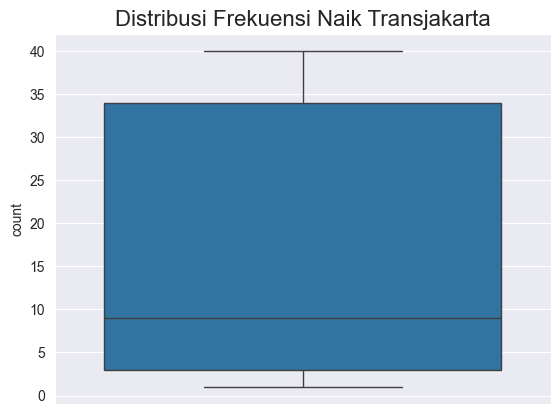

In [30]:
# cek outliers

sns.boxplot(freqPenumpang['count'])
plt.title("Distribusi Frekuensi Naik Transjakarta",size = 16)
plt.show()

In [31]:
# deskripsi dari frekuensi penumpang naik transjakarta

freqPenumpang['count'].describe()

count    1924.000000
mean       16.491684
std        15.135046
min         1.000000
25%         3.000000
50%         9.000000
75%        34.000000
max        40.000000
Name: count, dtype: float64

#### **Membuat Histogram**

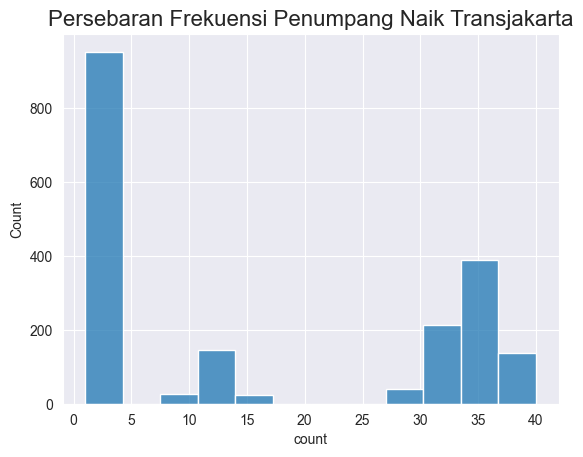

In [32]:
# membuat histogram

sns.histplot(freqPenumpang['count'])
plt.title('Persebaran Frekuensi Penumpang Naik Transjakarta',size=16)
plt.show()

#### **Menarik Data Top 10 Penumpang yang Paling Sering Naik Transjakarta**

In [33]:
# membentuk top 10 penumpang yang paling sering naik transjakarta

top10Penumpang = freqPenumpang.head(10)
top10Penumpang

,payCardName,payCardBank,payCardID,ageCat,count
1847,"dr. Laswi Pranowo, S.Pd",dki,4705243679928131,11-20,40
1408,Raisa Wibisono,bni,36862448099508,11-20,40
1698,Upik Maheswara,flazz,575724437786,11-20,39
1662,Tirtayasa Farida,emoney,180029887732247,11-20,39
1548,"T. Dadap Pradana, M.Ak",dki,3580401035990896,11-20,39
1406,Raisa Palastri,online,4821029051872,11-20,39
1341,"R.A. Salwa Yuliarti, M.TI.",dki,4164398783623350,51-60,39
1219,Pia Simanjuntak,emoney,341371220559499,41-50,39
963,Laila Simanjuntak,flazz,566171543168,31-40,39
911,Karma Sihotang,dki,4380073493099534,41-50,39


##### **Insight:**

1. Dari boxplot tersebut, diperoleh median dari frekuensi penumpang naik transjakarta adalah 9 kali.
2. Dari histogram, diperoleh frekuensi penumpang yang hanya naik transjakarta 1-5 kali cukup banyak.
3. Dapat ditarik data top 10 penumpang yang paling sering menggunakan transjakarta.

### **Kesimpulan**



Setelah dilakukan analisis, diperoleh kesimpulan berikut.

1. Berdasarkan gender, penumpang perempuan lebih banyak daripada penumpang laki-laki.
2. Berdasarkan kategori usia, paling banyak adalah penumpang dengan kategori 31-40 tahun. Berdasarkan data, banyak penumpang akan semakin menurun jika kategori usianya semakin tua.
3. Tidak ada hubungan antara variabel usia dengan harga transjakarta.
4. Tidak ada hubungan antara variabel usia dengan jam tap in.
5. Paycard Bank yang paling banyak digunakan oleh penumpang adalah Bank DKI.
6. Waktu terjadi lonjakan jumlah penumpang adalah ketika jam 6 pagi dan jam 5 sore. Jam 6 pagi adalah waktu dimana rata-rata masyarakat pergi bekerja atau sekolah, sedangkan jam 5 sore adalah waktu dimana rata-rata masyarakat pulang bekerja.
7. Diperoleh top 10 penumpang yang paling sering menggunakan transjakarta. Dari data frekuensi penumpang naik transjakarta, diperoleh juga bahwa penumpang yang hanya naik 1-5 kali saja cukup banyak. Median dari frekuensi penumpang naik transjakarta adalah 9 kali.

## **Rekomendasi**

1. Untuk menarik minat penumpang agar rajin menggunakan transjakarta, bisa diadakan program loyalitas, dimana setiap mereka naik transjakarta, maka mereka akan mendapatkan poin. Poin tersebut dapat ditukar/diredeem dengan perjalanan menggunakan transjakarta secara gratis. Misalkan :
setiap 20 poin dapat ditukar dengan 1x naik transjakarta secara gratis seharga Rp3.500 atau dapat dijadikan potongan harga ketika membeli barang di merchant-merchant yang bekerjasama dengan bank-bank tersebut.
2. Untuk menarik minat khususnya para pelajar/mahasiswa, dapat diberikan program harga khusus untuk pelajar. Misalkan :
- Diberikan harga Rp2.000 (untuk harga yang awalnya adalah Rp3.500) jika naik transjakarta pada weekdays.
- Untuk harga yang awalnya adalah Rp20.000, diberikan harga Rp18.000 jika naik transjakarta pada weekdays.
